# Stoichiometry Exercises

*These exercises accompany Lecture 2.*

In [1]:
###### Exercise 1
import numpy as np

A_NO_ox = ['NO','O2','NO2']
nu_NO_ox = np.array([[-2,-1,2]])
M_NO_ox = np.array([[30.01,32.00,46.01]]).T
print('NO oxidation nu matrix:\n',nu_NO_ox)
print('\nNO oxidation: nu dot M =',np.dot(nu_NO_ox,M_NO_ox))
print('\nEntries that are essentially zero:\n', np.dot(nu_NO_ox,M_NO_ox)**2<1E-13)

A_wgs = ['H','H2','OH','H2O','CO','CO2']
nu_wgs = np.array([[0,1,0,-1,-1,1],[-1,1,1,-1,0,0],[1,0,-1,0,-1,1]])
M_wgs = np.array([[1.01,2.02,17.01,18.02,28.01,44.01]]).T
print('\n\nWGS nu matrix:\n',nu_wgs)
print('\nWGS: nu dot M=\n',np.dot(nu_wgs,M_wgs)) 
print('\nEntries that are essentially zero:\n', np.dot(nu_wgs,M_wgs)**2<1E-13)


NO oxidation nu matrix:
 [[-2 -1  2]]

NO oxidation: nu dot M = [[-1.42108547e-14]]

Entries that are essentially zero:
 [[ True]]


WGS nu matrix:
 [[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]
 [ 1  0 -1  0 -1  1]]

WGS: nu dot M=
 [[ 0.00000000e+00]
 [ 1.99840144e-15]
 [-3.55271368e-15]]

Entries that are essentially zero:
 [[ True]
 [ True]
 [ True]]


In [2]:
###### Exercise 2
rank_NO_ox = np.linalg.matrix_rank(nu_NO_ox)
print('Rank of NO oxidation nu matrix =',rank_NO_ox)

n_rxns_NO_ox = np.shape(nu_NO_ox)[0] # number of rows

### If-then statements written to describe linear dependence
if rank_NO_ox < n_rxns_NO_ox:
    print('The reactions are linearly dependent.')
    print('There are',n_rxns_NO_ox-rank_NO_ox,'more reactions than needed to satisfy the overall balance.')
elif rank_NO_ox == n_rxns_NO_ox:
    print('All reactions are linearly independent.')
elif rank_NO_ox > n_rxns_NO_ox:
    print('This is not possible. Check your work.')

rank_wgs = np.linalg.matrix_rank(nu_wgs)
print('\nRank of WGS nu matrix =',rank_wgs)

n_rxns_wgs = np.shape(nu_wgs)[0]

### If-then statements written to describe linear dependence
if rank_wgs < n_rxns_wgs:
    print('The reactions are linearly dependent.')
    print('There are',n_rxns_wgs-rank_wgs,'more reactions than needed to satisfy the overall balance.')
elif rank_wgs == n_rxns_wgs:
    print('All reactions are linearly independent.')
elif rank_wgs > n_rxns_wgs:
    print('This is not possible. Check your work.')


Rank of NO oxidation nu matrix = 1
All reactions are linearly independent.

Rank of WGS nu matrix = 2
The reactions are linearly dependent.
There are 1 more reactions than needed to satisfy the overall balance.


In [4]:
###### Exercise 3

print('nu_NO_ox is\n',nu_NO_ox,'\nand its transpose is\n',nu_NO_ox.T)
r_NO_ox = [5]
R_NO_ox = np.dot(nu_NO_ox.T,r_NO_ox)
#print('Given that r_NO_ox is:\n',r_NO_ox,'we find that R_NO_ox is\n',R_NO_ox_labels,'=',R_NO_ox)

print('\nnu_wgs is\n',nu_wgs,'\nand its transpose is\n',nu_wgs.T)
r_wgs = np.array([[1,2,4]]).T
R_wgs = np.dot(nu_wgs.T,r_wgs)
print('Given that r_wgs is:\n',r_wgs,'\nwe find that R_wgs is\n',R_wgs)

import pandas as pd
r_wgs_df = pd.DataFrame(data=R_wgs,index=A_wgs,columns=['R_j'])
r_wgs_df


nu_NO_ox is
 [[-2 -1  2]] 
and its transpose is
 [[-2]
 [-1]
 [ 2]]

nu_wgs is
 [[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]
 [ 1  0 -1  0 -1  1]] 
and its transpose is
 [[ 0 -1  1]
 [ 1  1  0]
 [ 0  1 -1]
 [-1 -1  0]
 [-1  0 -1]
 [ 1  0  1]]
Given that r_wgs is:
 [[1]
 [2]
 [4]] 
we find that R_wgs is
 [[ 2]
 [ 3]
 [-2]
 [-3]
 [-5]
 [ 5]]


,R_j
H,2
H2,3
OH,-2
H2O,-3
CO,-5
CO2,5


In [8]:
### Exercise 4

R_wgs = np.array([[2,3,-2,-3,-5,5]]).T

print('Imagine you see that R_wgs =\n',R_wgs)

#print('\nnu_wgs is\n', nu_wgs)
#print('The transpose of nu_wgs is\n',nu_wgs.T)
#print('The dot product of nu_wgs and its inverse is\n',np.dot(nu_wgs,nu_wgs.T))
#print('The inverse of the nu dot nu_wgs is\n',np.linalg.inv(np.dot(nu_wgs,nu_wgs.T)))
#print('Therefore r_wgs is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs,nu_wgs.T)),nu_wgs,R_wgs]))

nu_wgs_a = np.delete(nu_wgs,0,0)
print('\nwhen nu_wgs is instead\n', nu_wgs_a)
print('The transpose of nu_wgs is\n',nu_wgs_a.T)
print('The dot product of nu_wgs and its inverse is\n',np.dot(nu_wgs_a,nu_wgs_a.T))
print('The inverse of the nu dot nu_wgs is\n',np.linalg.inv(np.dot(nu_wgs_a,nu_wgs_a.T)))
print('Therefore r_wgs is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_a,nu_wgs_a.T)),nu_wgs_a,R_wgs]))

nu_wgs_b = np.delete(nu_wgs,1,0)
print('\nwhen nu_wgs is instead\n', nu_wgs_b)
print('The transpose of nu_wgs is\n',nu_wgs_b.T)
print('The dot product of nu_wgs and its inverse is\n',np.dot(nu_wgs_b,nu_wgs_b.T))
print('The inverse of the nu dot nu_wgs is\n',np.linalg.inv(np.dot(nu_wgs_b,nu_wgs_b.T)))
print('Therefore r_wgs is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_b,nu_wgs_b.T)),nu_wgs_b,R_wgs]))

nu_wgs_c = np.delete(nu_wgs,2,0)
print('\nwhen nu_wgs is instead\n', nu_wgs_c)
print('The transpose of nu_wgs is\n',nu_wgs_c.T)
print('The dot product of nu_wgs and its inverse is\n',np.dot(nu_wgs_c,nu_wgs_c.T))
print('The inverse of the nu dot nu_wgs is\n',np.linalg.inv(np.dot(nu_wgs_c,nu_wgs_c.T)))
print('Therefore r_wgs is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_c,nu_wgs_c.T)),nu_wgs_c,R_wgs]))

Imagine you see that R_wgs =
 [[ 2]
 [ 3]
 [-2]
 [-3]
 [-5]
 [ 5]]

when nu_wgs is instead
 [[-1  1  1 -1  0  0]
 [ 1  0 -1  0 -1  1]]
The transpose of nu_wgs is
 [[-1  1]
 [ 1  0]
 [ 1 -1]
 [-1  0]
 [ 0 -1]
 [ 0  1]]
The dot product of nu_wgs and its inverse is
 [[ 4 -2]
 [-2  4]]
The inverse of the nu dot nu_wgs is
 [[0.33333333 0.16666667]
 [0.16666667 0.33333333]]
Therefore r_wgs is
 [[3.]
 [5.]]

when nu_wgs is instead
 [[ 0  1  0 -1 -1  1]
 [ 1  0 -1  0 -1  1]]
The transpose of nu_wgs is
 [[ 0  1]
 [ 1  0]
 [ 0 -1]
 [-1  0]
 [-1 -1]
 [ 1  1]]
The dot product of nu_wgs and its inverse is
 [[4 2]
 [2 4]]
The inverse of the nu dot nu_wgs is
 [[ 0.33333333 -0.16666667]
 [-0.16666667  0.33333333]]
Therefore r_wgs is
 [[3.]
 [2.]]

when nu_wgs is instead
 [[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]]
The transpose of nu_wgs is
 [[ 0 -1]
 [ 1  1]
 [ 0  1]
 [-1 -1]
 [-1  0]
 [ 1  0]]
The dot product of nu_wgs and its inverse is
 [[4 2]
 [2 4]]
The inverse of the nu dot nu_wgs is
 [[ 0.33333

In [9]:
### Exercise 5

error = np.random.uniform(0.95,1.05,(6,1))
print('An array of random errors between -5% and +5% is\n', error)

R_wgs_a = R_wgs*error
print('\nThe array of rates with errors is therefore\n',R_wgs_a)

print('\nTherefore r_wgs from nu_wgs_a is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_a,nu_wgs_a.T)),nu_wgs_a,R_wgs_a]))
print('\nTherefore r_wgs from nu_wgs_b is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_b,nu_wgs_b.T)),nu_wgs_b,R_wgs_a]))
print('\nTherefore r_wgs from nu_wgs_c is\n',np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_c,nu_wgs_c.T)),nu_wgs_c,R_wgs_a]))

An array of random errors between -5% and +5% is
 [[1.03316943]
 [1.00611247]
 [0.98480032]
 [1.0318096 ]
 [1.04257477]
 [0.96540383]]

The array of rates with errors is therefore
 [[ 2.06633885]
 [ 3.01833741]
 [-1.96960064]
 [-3.09542881]
 [-5.21287387]
 [ 4.82701915]]

Therefore r_wgs from nu_wgs_a is
 [[3.038581  ]
 [5.03824863]]

Therefore r_wgs from nu_wgs_b is
 [[3.038581  ]
 [1.99966763]]

Therefore r_wgs from nu_wgs_c is
 [[ 5.03824863]
 [-1.99966763]]


r2 average: 3.0022474629566624
r3 average: 5.0069389331360545


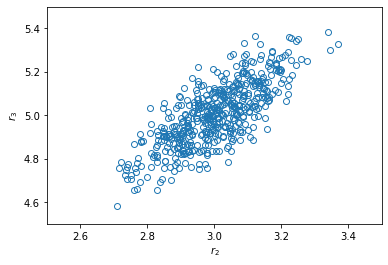

In [10]:
###### Exercise 6

for i in range(500):
        error = np.random.uniform(0.90,1.10,(6,1))
        R_wgs_a = R_wgs*error
        r_wgs_point = np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_a,nu_wgs_a.T)),nu_wgs_a,R_wgs_a])
        if i==0:
            r_wgs_with_errors = r_wgs_point
        else:
            r_wgs_with_errors = np.hstack((r_wgs_with_errors,r_wgs_point))

r2_ave = np.average(r_wgs_with_errors[0,:])
print('r2 average:',r2_ave)

r3_ave = np.average(r_wgs_with_errors[1,:])
print('r3 average:',r3_ave)
            
import matplotlib.pyplot as plt

plt.plot(r_wgs_with_errors[0,:],r_wgs_with_errors[1,:],'o',markerfacecolor='none')
plt.xlim(2.5,3.5)
plt.ylim(4.5,5.5)
plt.xlabel(r'$r_2$')
plt.ylabel(r'$r_3$')
plt.show()


In [13]:
###### Exercise 7

N0 = np.array([[0,0,0,9,4,1]]).T

known_species = [3,4]
Np = np.array([[7,2]]).T

N0p = N0[known_species,:]

print('Initial stoich matrix:\n',nu_wgs)

nu_wgs_p = np.delete(nu_wgs,2,0)
print('Stoich matrix after reaction 1 removed:\n',nu_wgs_p)

nu_wgs_pp = nu_wgs_p[:,known_species]
print('Stoich matrix after other species removed:\n',nu_wgs_pp)

ext = np.linalg.multi_dot([np.linalg.inv(np.dot(nu_wgs_pp,nu_wgs_pp.T)),nu_wgs_pp,(Np-N0p)])
print('Extents:\n',ext)

N = N0 + np.dot(nu_wgs_p.T,ext)

print('Final moles:\n',N)

Initial stoich matrix:
 [[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]
 [ 1  0 -1  0 -1  1]]
Stoich matrix after reaction 1 removed:
 [[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]]
Stoich matrix after other species removed:
 [[-1 -1]
 [-1  0]]
Extents:
 [[2.]
 [0.]]
Final moles:
 [[0.]
 [2.]
 [0.]
 [7.]
 [2.]
 [3.]]
